In [1]:
## Import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#3 Read the data

path = "C:\\Users\\chand\\onedrive\\Documents\\datascience\\Python Data files for Analysis\\Visadataset.csv"
visa_df = pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


$Categorical$ $VS$ $categorical$

In [ ]:
# one column  continent
# one column case_status
# as we know that there are 25480 observations are there
# in that 16K are from asia
# out of 16K applicants how many got visa approved
# and rejected

In [3]:
con = visa_df["continent"] == "Asia"
visa_df[con]

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
5,EZYV06,Asia,Master's,Y,N,2339,2012,South,78252.1400,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [4]:
c1 = visa_df["continent"] == "Asia"
c2 = visa_df["case_status"] == "Certified"
c3 = visa_df["case_status"] == "Denied"

cert_con = c1 & c2
den_con = c1 & c3
certified_count = len(visa_df[cert_con])
denied_count = len(visa_df[den_con])
print(f"There are {certified_count} got certified from Asia.")
print(f"There are {denied_count} got denied from Asia.")

There are 11012 got certified from Asia.
There are 5849 got denied from Asia.


In [5]:
labels = visa_df["continent"].unique()

certified_count = []
denied_count = []
for i in labels:
    c1 = visa_df["continent"] == i
    c2 = visa_df["case_status"] == "Certified"
    c3 = visa_df["case_status"] == "Denied"
    
    cert_con = c1 & c2
    den_con = c1 & c3
    certified_count.append(len(visa_df[cert_con]))
    denied_count.append(len(visa_df[den_con]))
    
    
col = ["continent","certified","denied"]
d = pd.DataFrame(zip(labels,certified_count,denied_count), columns = col)
d.set_index("continent")

,certified,denied
continent,,
Asia,11012,5849
Africa,397,154
North America,2037,1255
Europe,2957,775
South America,493,359
Oceania,122,70


In [6]:
visa_df["continent"].unique()

array(['Asia', 'Africa', 'North America', 'Europe', 'South America',
       'Oceania'], dtype=object)

**pd.crosstab**
- will take two arguments
- index
- column

In [14]:
col1 = visa_df["continent"]
col2 = visa_df["case_status"]
result1 = pd.crosstab(col1,col2)
result1

case_status,Certified,Denied
continent,,
Africa,397,154
Asia,11012,5849
Europe,2957,775
North America,2037,1255
Oceania,122,70
South America,493,359


In [15]:
col1 = [visa_df["continent"],visa_df["education_of_employee"]]
col2 = visa_df["case_status"]
result2 = pd.crosstab(col1,col2)
result2

case_status                          Certified  Denied
continent     education_of_employee                   
Africa        Bachelor's                    81      62
              Doctorate                     43      11
              High School                   23      43
              Master's                     250      38
Asia          Bachelor's                  4407    2761
              Doctorate                    780     143
              High School                  676    1614
              Master's                    5149    1331
Europe        Bachelor's                  1040     259
              Doctorate                    788      58
              High School                  162     328
              Master's                     967     130
North America Bachelor's                   641     584
              Doctorate                    207      51
              High School                  210     191
              Master's                     979     429
Oceania       Bachelor's                    38      28
              Doctorate                     19       3
              High School                   19      17
              Master's                      46      22
South America Bachelor's                   160     173
              Doctorate                     75      14
              High School                   74      63
              Master's                     184     109

<Axes: xlabel='continent'>

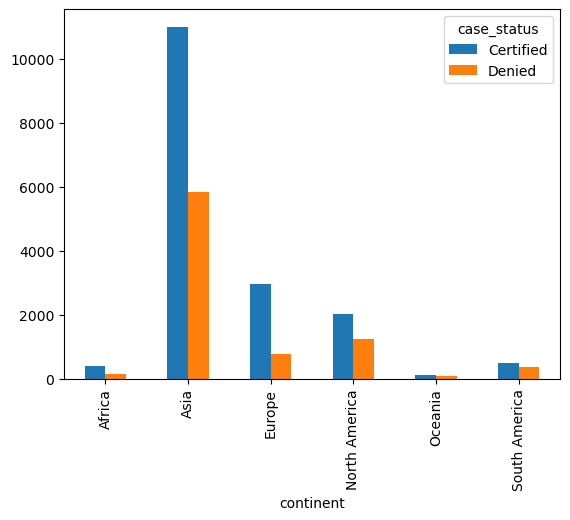

In [17]:
result1.plot(kind = "bar")

<Axes: xlabel='continent,education_of_employee'>

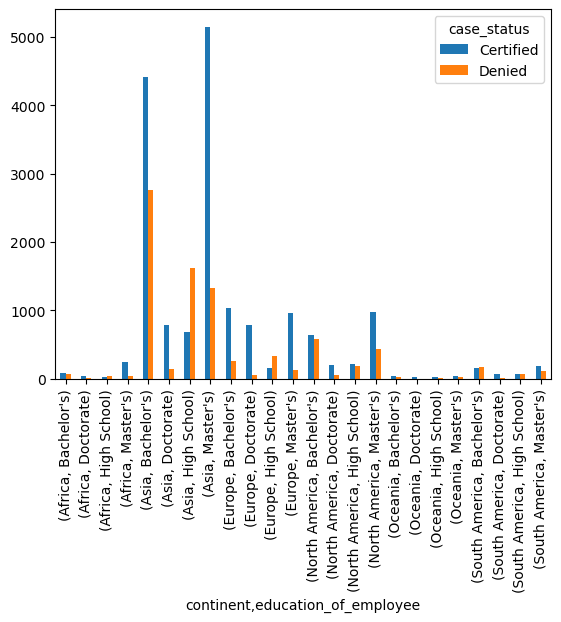

In [18]:
result2.plot(kind = "bar")

In [20]:
col1 = [visa_df["continent"],visa_df["education_of_employee"]]
col2 = visa_df["case_status"]
result = pd.crosstab(col2,col1)
result

continent                 Africa                                      Asia  \
education_of_employee Bachelor's Doctorate High School Master's Bachelor's   
case_status                                                                  
Certified                     81        43          23      250       4407   
Denied                        62        11          43       38       2761   

continent                                                Europe            \
education_of_employee Doctorate High School Master's Bachelor's Doctorate   
case_status                                                                 
Certified                   780         676     5149       1040       788   
Denied                      143        1614     1331        259        58   

continent              ... North America             Oceania            \
education_of_employee  ...   High School Master's Bachelor's Doctorate   
case_status            ...                                               
Certified              ...           210      979         38        19   
Denied                 ...           191      429         28         3   

continent                                  South America            \
education_of_employee High School Master's    Bachelor's Doctorate   
case_status                                                          
Certified                      19       46           160        75   
Denied                         17       22           173        14   

continent                                   
education_of_employee High School Master's  
case_status                                 
Certified                      74      184  
Denied                         63      109  

[2 rows x 24 columns]

<Axes: xlabel='case_status'>

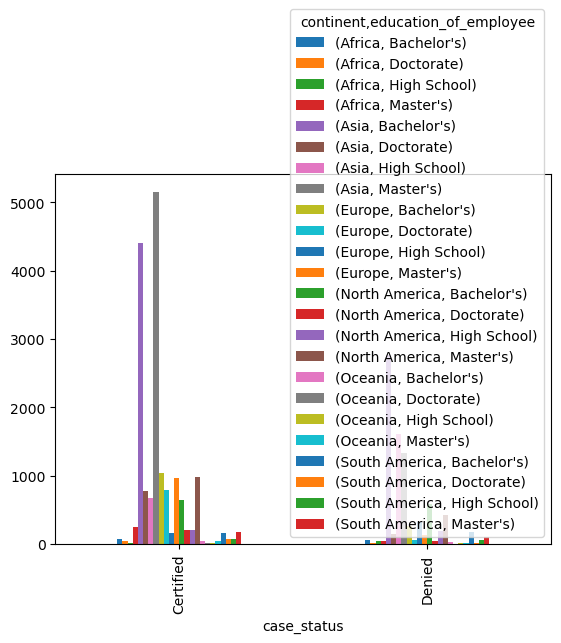

In [21]:
result.plot(kind = "bar")

<Axes: xlabel='continent'>

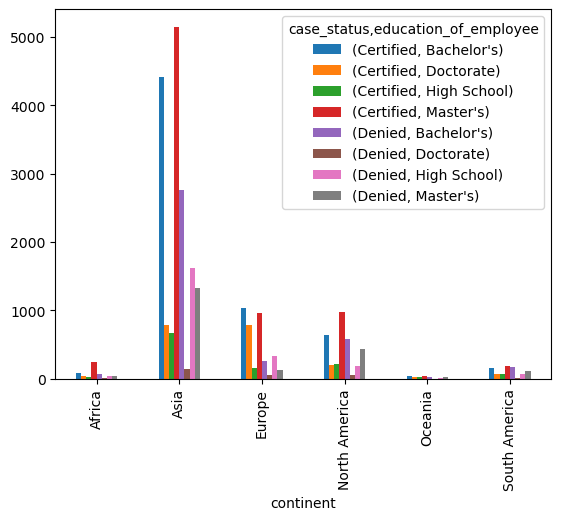

In [23]:
col1 = visa_df["continent"]
col2 = visa_df["case_status"]
col3 = visa_df["education_of_employee"]
result3 = pd.crosstab(col1,[col2,col3])
result3.plot(kind = "bar")

In [2]:
###  import the packages and read data

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

path = "C:\\Users\\chand\\onedrive\\Documents\\datascience\\Python Data files for Analysis\\Visadataset.csv"
visa_df = pd.read_csv(path)
visa_df

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


$Numerical$ vs $Numerical$

In [3]:
x = [1,2,3,4,5]
y = [1,2,3,4,5]
## (1,1) (2,2) (3,3) (4,4) (5,5)

**plt.scatter**

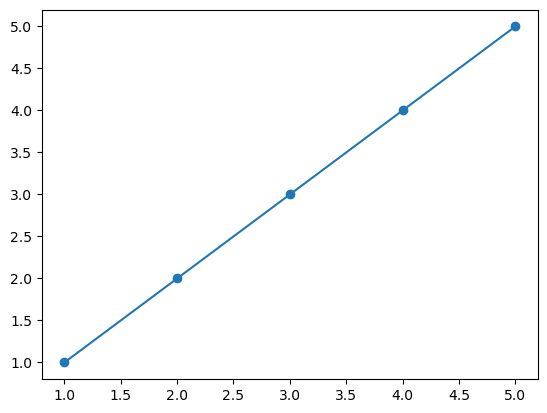

In [5]:
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

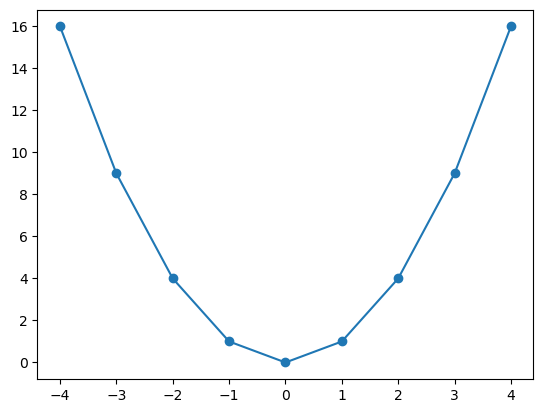

In [7]:
x = [i for i in range(-4,5)]
y = [i*i for i in x]
plt.scatter(x,y)
plt.plot(x,y)
plt.show()

In [10]:
# extract only numerical columns

num_cols = visa_df.select_dtypes(exclude = "object")
num_cols.columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

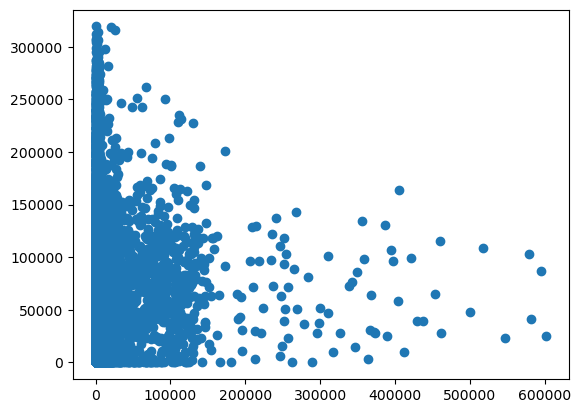

In [12]:
col1 = visa_df["no_of_employees"]
col2 = visa_df["prevailing_wage"]
plt.scatter(col1,col2)
plt.show()  #3 No relation

**Pearson corelation coefficient**

- r varies from -1 to 1
- r is 0 to 1 +ve relation
- r is 0 no relation
- r is -1 to 0 negative relation


r = Cov(x,y)/sigma X * sigma Y

- when you do this in python
- it gives the matrix
- in Visa data we have 3 numerical columns are there
- python will give a matrix w.r.to 3 numerical columns
- the values in each field tells about the relation between the variables

In [15]:
visa_df.corr(numeric_only = True)

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


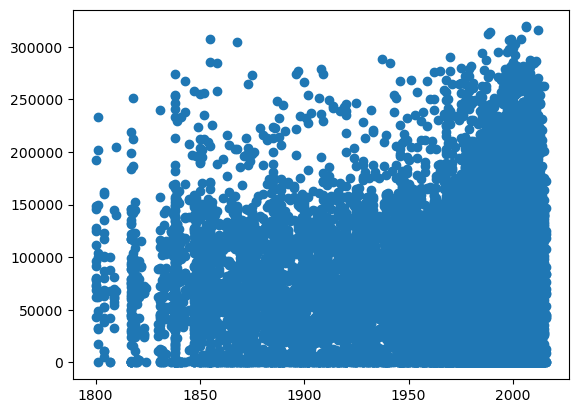

In [16]:
##  check the scatter plot between yr_of estab
# with prevailing_wage
# we are seeing the relation is 0.012342

col1 = visa_df["yr_of_estab"]
col2 = visa_df["prevailing_wage"]
plt.scatter(col1,col2)
plt.show()

In [18]:
wine = pd.read_csv("C:\\Users\\chand\\onedrive\\Documents\\datascience\\Python Data files for Analysis\\winequality_red.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [19]:
wine.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


In [20]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

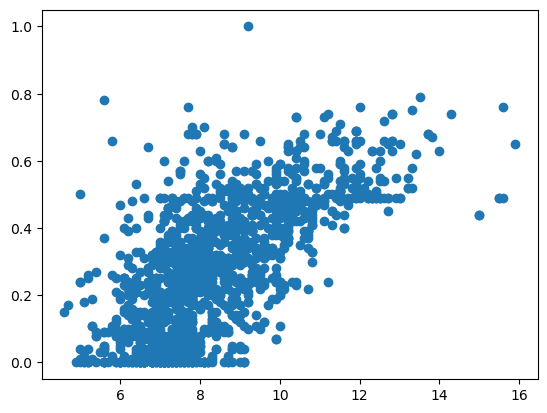

In [21]:
col1 = wine["fixed acidity"]
col2 = wine["citric acid"]
plt.scatter(col1,col2)
plt.show()

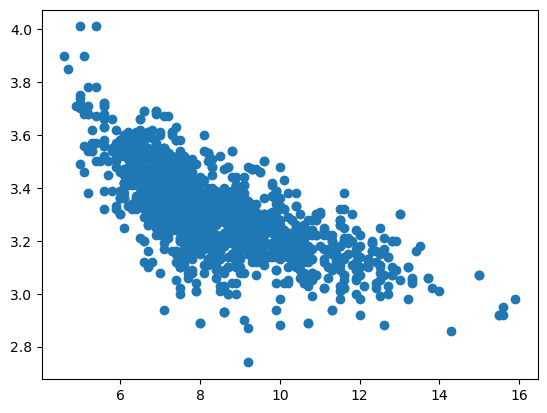

In [22]:
col1 = wine["fixed acidity"]
col2 = wine["pH"]
plt.scatter(col1,col2)
plt.show()

$heat$-$map$
- heat map is used to visualization of matrix
- it is under sea bron packages
- heat map will varies the values and gives the color about the values

In [23]:
corr_visa = visa_df.corr(numeric_only = True)
corr_visa

## this is a matrix we want apply a heat map

,no_of_employees,yr_of_estab,prevailing_wage
no_of_employees,1.000000,-0.017770,-0.009523
yr_of_estab,-0.017770,1.000000,0.012342
prevailing_wage,-0.009523,0.012342,1.000000


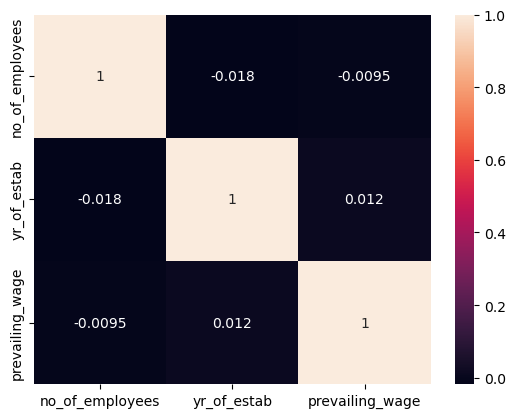

In [24]:
sns.heatmap(corr_visa, annot = True)
plt.show()

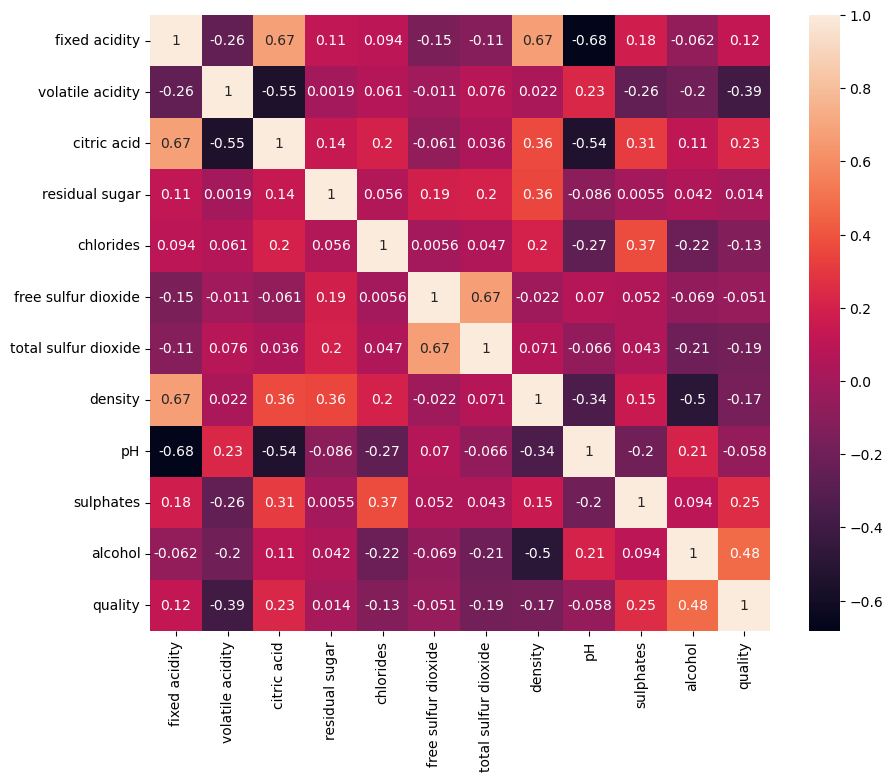

In [26]:
corr_wine = wine.corr(numeric_only = True)
plt.figure(figsize = (10,8))
sns.heatmap(corr_wine, annot = True)
plt.show()